# Class Balance Analysis: ua-name-places Dataset

This notebook analyzes the distribution of settlement types (city, town, village, hamlet, etc.) in the ua-name-places.csv dataset to identify potential class imbalances.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load the dataset
file_path = 'ua-name-places.csv'
df = pd.read_csv(file_path, encoding='utf-8')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (29678, 13)


In [3]:
print("Column Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
df.info()

Column Names:
['osm_id', 'katotth', 'koatuu', 'name', 'name:uk', 'place', 'population', 'postal_code', 'old_name', 'old_name:uk', 'region', 'rayon', 'hromada']

Data Types:
osm_id          int64
katotth        object
koatuu         object
name           object
name:uk        object
place          object
population     object
postal_code    object
old_name       object
old_name:uk    object
region         object
rayon          object
hromada        object
dtype: object

First few rows:
     osm_id              katotth      koatuu      name   name:uk place  \
0  26150422  UA80000000000093317  8000000000      Київ      Київ  city   
1  26150436  UA74100390010054825  7410100000  Чернігів  Чернігів  city   
2  26150437  UA51100270010076757  5110100000     Одеса     Одеса  city   
3  26150791  UA46060250010015970  4610100000     Львів     Львів  city   
4  27121360  UA53080370010073240  5310100000   Полтава   Полтава  city   

  population  postal_code old_name old_name:uk                reg

In [4]:
# Calculate class distribution
place_counts = df['place'].value_counts()
place_percentages = df['place'].value_counts(normalize=True) * 100

# Create summary table
summary_df = pd.DataFrame({
    'Type': place_counts.index,
    'Count': place_counts.values,
    'Percentage': place_percentages.values
})

summary_df['Percentage'] = summary_df['Percentage'].round(2)
summary_df = summary_df.reset_index(drop=True)

print("\nClass Distribution Summary:")
print(summary_df.to_string(index=False))

# Overall statistics
print(f"\nTotal unique settlement types: {df['place'].nunique()}")
print(f"Total entries: {len(df)}")
print(f"\nMost common type: {place_counts.index[0]} ({place_counts.values[0]} entries)")
print(f"Least common type: {place_counts.index[-1]} ({place_counts.values[-1]} entries)")


Class Distribution Summary:
   Type  Count  Percentage
village  25483       85.86
 hamlet   2945        9.92
   town   1204        4.06
   city     46        0.15

Total unique settlement types: 4
Total entries: 29678

Most common type: village (25483 entries)
Least common type: city (46 entries)


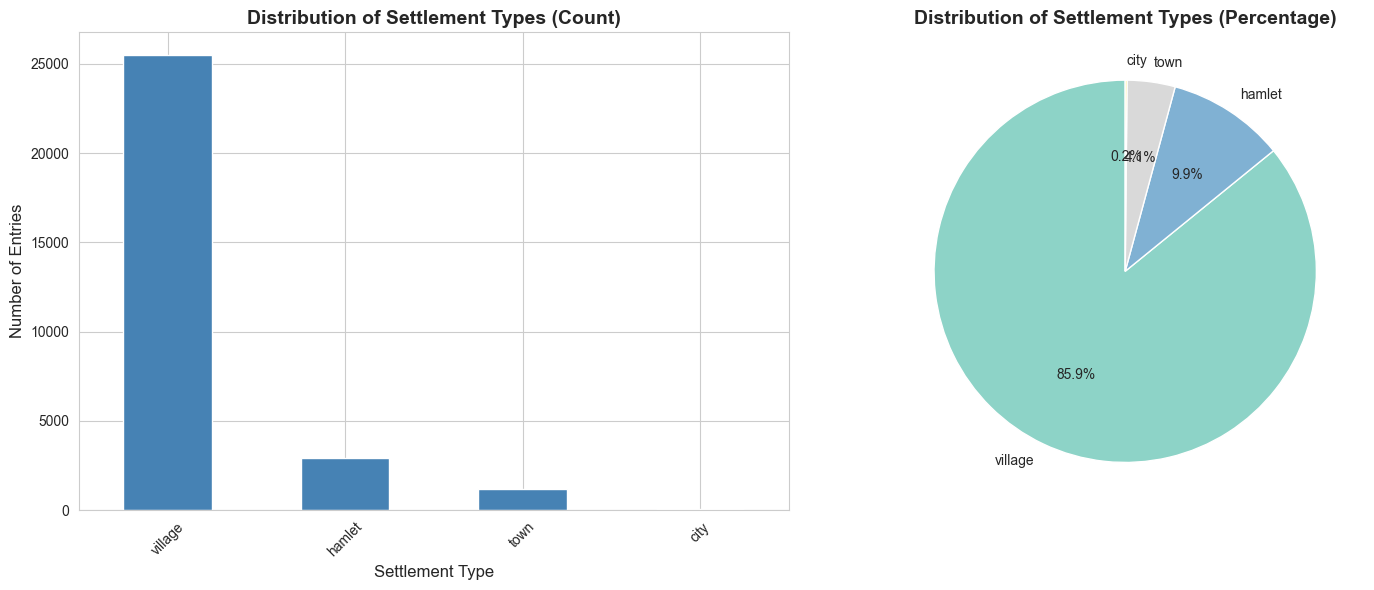

In [5]:
# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
place_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Settlement Types (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Settlement Type', fontsize=12)
axes[0].set_ylabel('Number of Entries', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(place_counts)))
axes[1].pie(place_counts.values, labels=place_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Distribution of Settlement Types (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [6]:
# Detailed summary statistics
print("\n" + "="*60)
print("DETAILED CLASS BALANCE ANALYSIS")
print("="*60)

print("\nClass Distribution (sorted by count):")
print(summary_df.to_string(index=False))

# Imbalance metrics
max_count = place_counts.max()
min_count = place_counts.min()
imbalance_ratio = max_count / min_count

print(f"\n\nImbalance Metrics:")
print(f"  - Max count: {max_count} ({place_counts.idxmax()})")
print(f"  - Min count: {min_count} ({place_counts.idxmin()})")
print(f"  - Imbalance ratio (max/min): {imbalance_ratio:.2f}:1")

# Identify highly imbalanced classes
threshold = place_percentages.mean()  # average percentage
imbalanced = summary_df[summary_df['Percentage'] < threshold]

print(f"\n\nClasses below average ({threshold:.2f}%):")
print(imbalanced.to_string(index=False))

# Top 3 and Bottom 3
print(f"\n\nTop 3 classes:")
print(summary_df.head(3).to_string(index=False))

print(f"\nBottom 3 classes:")
print(summary_df.tail(3).to_string(index=False))


DETAILED CLASS BALANCE ANALYSIS

Class Distribution (sorted by count):
   Type  Count  Percentage
village  25483       85.86
 hamlet   2945        9.92
   town   1204        4.06
   city     46        0.15


Imbalance Metrics:
  - Max count: 25483 (village)
  - Min count: 46 (city)
  - Imbalance ratio (max/min): 553.98:1


Classes below average (25.00%):
  Type  Count  Percentage
hamlet   2945        9.92
  town   1204        4.06
  city     46        0.15


Top 3 classes:
   Type  Count  Percentage
village  25483       85.86
 hamlet   2945        9.92
   town   1204        4.06

Bottom 3 classes:
  Type  Count  Percentage
hamlet   2945        9.92
  town   1204        4.06
  city     46        0.15
